## ポートフォリオ構築におけるパラメタを調整
1. リターン計算期間：日次リターンの累積、日次リターン、月次リターン
    1. 日次リターンの累積 ... $\sum_t( r^c_tw - b^c)^2$ を最小化 ($r^c_t$は計算期間開始から基準日$t$までの累積リターン、$b^c$はインデックスの日次累積リターン)
    1. 日次リターン ... $\sum_t( r^d_tw - b^d)^2$ を最小化 ($r^d_t$は基準日$t$での日次リターン、$b^d$はインデックスの日次リターン)
    1. 日次リターン ... $\sum_t( r^m_tw - b^m)^2$ を最小化 ($r^m_t$は基準日$t$での月次リターン、$b^m$はインデックスの月次累積リターン)

## 結果１
![チャート](comparison_return_period_48.png)
![チャート](comparison_return_period_60.png)
![チャート](comparison_return_period_72.png)
![TE](te_comp.png)

In [18]:
import matplotlib.pyplot as plt
 
 
def grouped_bar(xlabel,y,isvalue=False,groupwidth=0.8,barwidth=0.9,location='best'):
    '''
    グループ化した棒グラフの描画
    
    Parameters
    ----------------------------
    isvalue:bool
        グラフ上部への値の表示／非表示
    groupwidth:float
        １つのグループの幅 を 0～1で指定。
    barwidth:float
        グループ内の棒グラフ１つ当たりの幅を0～1で指定。
    location:int,str
        凡例の表示場所
    '''
    
    x = [i + 1 for i in range(len(xlabel))]
    barcnt = len(y)
    size = groupwidth / barcnt
    xx = groupwidth/ 2
    
    # 棒グラフの描画
    for i in range(barcnt):
        pos = [size / 2 + x[n] - xx + size * i for n in range(len(x))]
        rect = plt.bar(pos, y[i][1], width=size * barwidth, label=y[i][0], align="center")
        
        # グラフに値を表示
        if isvalue == True:
            for tx, ty in zip(pos, y[i][1]):
                plt.text(tx, ty, ty, ha='center', va='bottom')
    
    # 凡例
    plt.legend (loc=location)
    
    # X軸のラベルを表示
    plt.xticks(x, xlabel)
    plt.title('Comparison of TE')
    # plt.show()
    plt.savefig('te_comp.png')
 

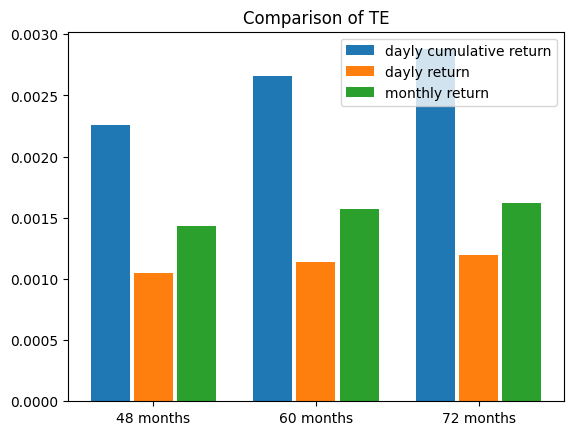

In [19]:
y = []
y.append(('dayly cumulative return',[0.0022614485768998605, 0.002656298306146887, 0.0028770335391969937]))
y.append(('dayly return',[0.0010450327318714536, 0.0011347655346964913, 0.0011936727672925418]))
y.append(('monthly return',[0.0014293971193221622, 0.0015744487674321794, 0.0016193798633987733]))

xlabel = ['48 months', '60 months', '72 months']
 
grouped_bar(xlabel,y,False)